In [29]:
import numpy as np
import pandas as pd
%matplotlib inline

In [30]:
font_size = ("font-size", "150%")
bg_color = ('background-color', 'black')

styles = [
    {"selector": "th", "props": [font_size, bg_color, ('color', 'white')]}, 
    {"selector": "td", "props": [font_size, bg_color]}
]
pct_format = '{:,.0%}'

def color_alert(val):
    if val > 100:
        color = "white"
    elif val > 0.5:
        color = "red"
    elif val > 0.3:
        color = "orange"
    elif val > 0.1:
        color = "yellow"
    else:
        color = "gray"
    return 'color: %s' % color

In [31]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url)

## Summary

In [32]:
print(f"As of: {df.columns[-1]}")

As of: 3/14/20


In [33]:
def growth_by_group(df, colname_grouping, n_largest):
    last_date = df.columns[-1]
    ago_1d = df.columns[-2]
    ago_3d = df.columns[-4]
    ago_7d = df.columns[-8]
    dates = [ago_7d, ago_3d, ago_1d, last_date]

    growth = df.groupby(colname_grouping)[dates].sum()
    total_row = pd.DataFrame({date: total for date, total in zip(dates, df[dates].sum())}, index =["TOTAL"])
    growth = pd.concat([total_row, growth])
    
    growth['# Cases'] = growth[last_date]
    growth['%/day (1d)'] = growth[last_date]/growth[ago_1d] - 1
    growth['%/day (3d)'] = (growth[last_date]/growth[ago_3d]).pow(1/3) - 1
    growth['%/day (7d)'] = (growth[last_date]/growth[ago_7d]).pow(1/7) - 1

    return growth \
        .nlargest(n_largest, last_date)[['# Cases', '%/day (7d)', '%/day (3d)', '%/day (1d)']] \
        .style.set_table_styles(styles) \
        .format(pct_format).format({'# Cases': '{:,}'}).applymap(color_alert)
    

## Top Countries

In [34]:
growth_by_group(df, 'Country/Region', 20)

,# Cases,%/day (7d),%/day (3d),%/day (1d)
TOTAL,"156,102",6%,7%,8%
China,"80,977",0%,0%,0%
Italy,"21,157",20%,19%,20%
Iran,"12,729",12%,12%,12%
"Korea, South","8,086",2%,1%,1%
Spain,"6,391",44%,41%,22%
Germany,"4,585",28%,34%,25%
France,"4,480",25%,25%,22%
US,"2,727",31%,29%,25%
Switzerland,"1,359",26%,28%,19%


In [35]:
growth_by_group(df[df['Country/Region'] == 'US'], 'Province/State', 20)

,# Cases,%/day (7d),%/day (3d),%/day (1d)
TOTAL,"2,727",31%,29%,25%
Washington,572,inf%,16%,1%
New York,525,inf%,34%,25%
California,340,inf%,24%,21%
Massachusetts,138,inf%,13%,12%
Colorado,101,inf%,44%,106%
Louisiana,77,inf%,134%,114%
Florida,76,inf%,39%,52%
New Jersey,69,inf%,44%,138%
Georgia,66,inf%,42%,57%


## Non-China growth (linear, log)

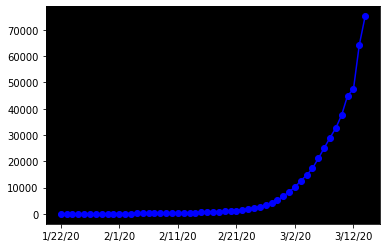

In [36]:
non_china = df[df['Country/Region'] != 'China'].iloc[:, 4:].sum()
non_china.plot(style=['bo-']).set_facecolor("black")

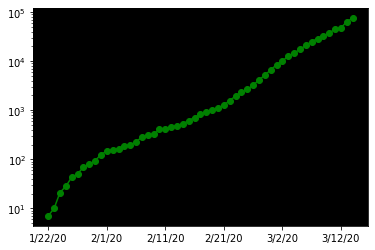

In [37]:
non_china.plot(style=['go-'], logy=True).set_facecolor("black")